### Data Dictionary:
Variable: definition
- PassengerId: unique Id for passenger given in dataset
- Survived: Survival (0 = No, 1 = Yes)
- Pclass: Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
    - 1st = Upper
    - 2nd = Middle
    - 3rd = Lower
- Name: name of passenger
- Sex: Sex
- Age: Age in years
    - Age is fractional if less than 1. If the age is estmiated, it is in the form of xx.5
- SibSp: # of siblings / spouses aboard the Titanic
    - The dataset defines family relations in this way:
        - Sibling = brother, sister, stepbrother, stepsister
        - Spouse = husband, wife (mistresses and fiances were ignored)
- Parch: # of parents / children aboard the Titanic
    - The dataset defines family relations in this way:
        - Parent = mother, father
        - Sibling = daughter, son, stepdaughter, stepdaughter
        - Some children travelled only with a nanny, therefore parch=0 for them.
- Ticket: Ticket number
- Fare: Passenger fare
- Cabin: Cabin number
- Embarked: Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton) 

# Dataset Questions:
- What factors made people more likely to survive?
    - Was age a factor in survival?
    - Was class a factor in survival?
    - Was gender a factor in survival?
    - Was cabin number a factor in survival?

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from string import digits

# DATA WRANGLING

In [2]:
# Dataset size of 891 rows x 12 columns
filename = 'titanic_data.csv'
titanic_df = pd.read_csv(filename)
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [3]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


#### Missing data for variables of interest:
- Missing values exist for variables 'Cabin' and 'Age'
    - Missing values for 'Cabin' variable can not be extrapolated so analysis will be done on the subset of data that have values
    - Missing values for 'Age' variable could be replaced with the mean or median values of age by sex and if deceased or not, but would afford more prominent modes for histogram plots. The subset of data that have values will be used for analysis.
    
#### Datatypes:
- 'Sex', 'Survived', and 'Pclass' should be categorical data type

In [4]:
# Change dtypes of specific variables
titanic_df['Pclass'] = titanic_df['Pclass'].astype('category')
titanic_df['Sex'] = titanic_df['Sex'].astype('category')
titanic_df['Survived'] = titanic_df['Survived'].astype('category')
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null category
Pclass         891 non-null category
Name           891 non-null object
Sex            891 non-null category
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: category(3), float64(2), int64(3), object(4)
memory usage: 65.6+ KB


In [5]:
# Overall survival vs number of passengers
survivor_count = len(titanic_df[titanic_df.Survived == 1])
passenger_count = len(titanic_df['Survived'])
survival_proportion = float(survivor_count)/float(passenger_count)

print 'Number of survivors:', survivor_count
print 'Number of passengers:', passenger_count
print 'Survival rate:', survival_proportion

Number of survivors: 342
Number of passengers: 891
Survival rate: 0.383838383838


In [6]:
# Dataset where a value exists for every field/column/feature
titanic_exists = titanic_df.dropna()

# Number of rows in dataset
print 'Number of rows with a value in each column:', len(titanic_exists)

Number of rows with a value in each column: 183


- Lots of missing data overall
- 183 out of 891 entries are complete

# AGE INVESTIGATION

- Was an individual's age influential to survival?

In [7]:
# Creates a Series of 'Age' values that exist
age_exists = titanic_df['Age'].dropna()

# Creates DataFrame where there exists an 'Age' value; 714 passengers with an 'Age' value
age_df = titanic_df[titanic_df.Age.isin(age_exists)]

# Overall survival vs number of passengers
print "Given a value exists for 'Age'"
print 'Number of survivors:', len(age_df[age_df.Survived == 1])
print 'Number of passengers:', len(age_df['Survived'])
print 'Survival proportion:', float(len(age_df[age_df.Survived == 1]))/float(len(age_df['Survived']))

Given a value exists for 'Age'
Number of survivors: 290
Number of passengers: 714
Survival proportion: 0.406162464986


### Note:
- The survival proportion in this dataframe comes close to that of titanic_df (survival proportion = 0.384)

In [8]:
# Creates dataframes for those who survived and those who died
age_survivors = age_df[age_df['Survived'] == 1]
age_deceased = age_df[age_df['Survived'] == 0]

print 'Number of survivors:', len(age_survivors)
print 'Number of deceased:', len(age_deceased)

Number of survivors: 290
Number of deceased: 424


In [9]:
age_survivors['Age'].describe()

count    290.000000
mean      28.343690
std       14.950952
min        0.420000
25%       19.000000
50%       28.000000
75%       36.000000
max       80.000000
Name: Age, dtype: float64

In [10]:
age_deceased['Age'].describe()

count    424.000000
mean      30.626179
std       14.172110
min        1.000000
25%       21.000000
50%       28.000000
75%       39.000000
max       74.000000
Name: Age, dtype: float64

- Very similar distributions of 'Age' amongst deceased and survivors based on summary statistics

Populating the interactive namespace from numpy and matplotlib


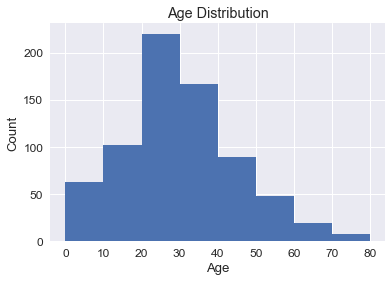

In [11]:
# Histogram of Ages 
bins = [0,10,20,30,40,50,60,70,80]

# Figure Parameters
% pylab inline
sns.set(style="darkgrid", font_scale=1.2);

plt.hist(age_df['Age'], bins);
plt.xlabel('Age');
plt.ylabel('Count');
plt.title('Age Distribution');

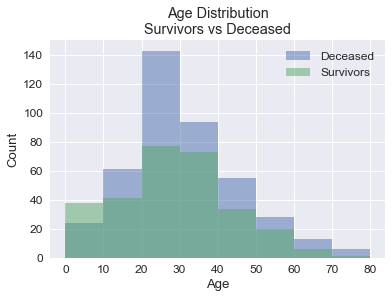

In [12]:
# Histogram of those who survived and died by age
plt.hist(age_deceased['Age'], bins, alpha=0.5, label='Deceased');
plt.hist(age_survivors['Age'], bins, alpha=0.5, label='Survivors');
plt.xlabel('Age');
plt.ylabel('Count');
plt.title('Age Distribution\nSurvivors vs Deceased');
plt.legend(loc='upper right');

## Results
- Younger passengers (age < 10) survived proportionally higher than any other binned group
- Young adults (age 20 - 30) died proportionally higher than any other binned group

# CLASS INVESTIGATION
- Was an individual's class influential to survival?

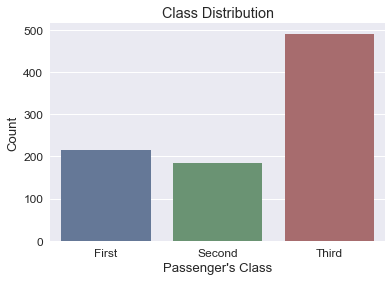

In [13]:
# Count Plot by class
class_plot = sns.countplot(x='Pclass', data=titanic_df, saturation=0.5);
class_plot.set_xticklabels(['First', 'Second', 'Third']);
plt.title('Class Distribution');
plt.xlabel("Passenger's Class");
plt.ylabel('Count');

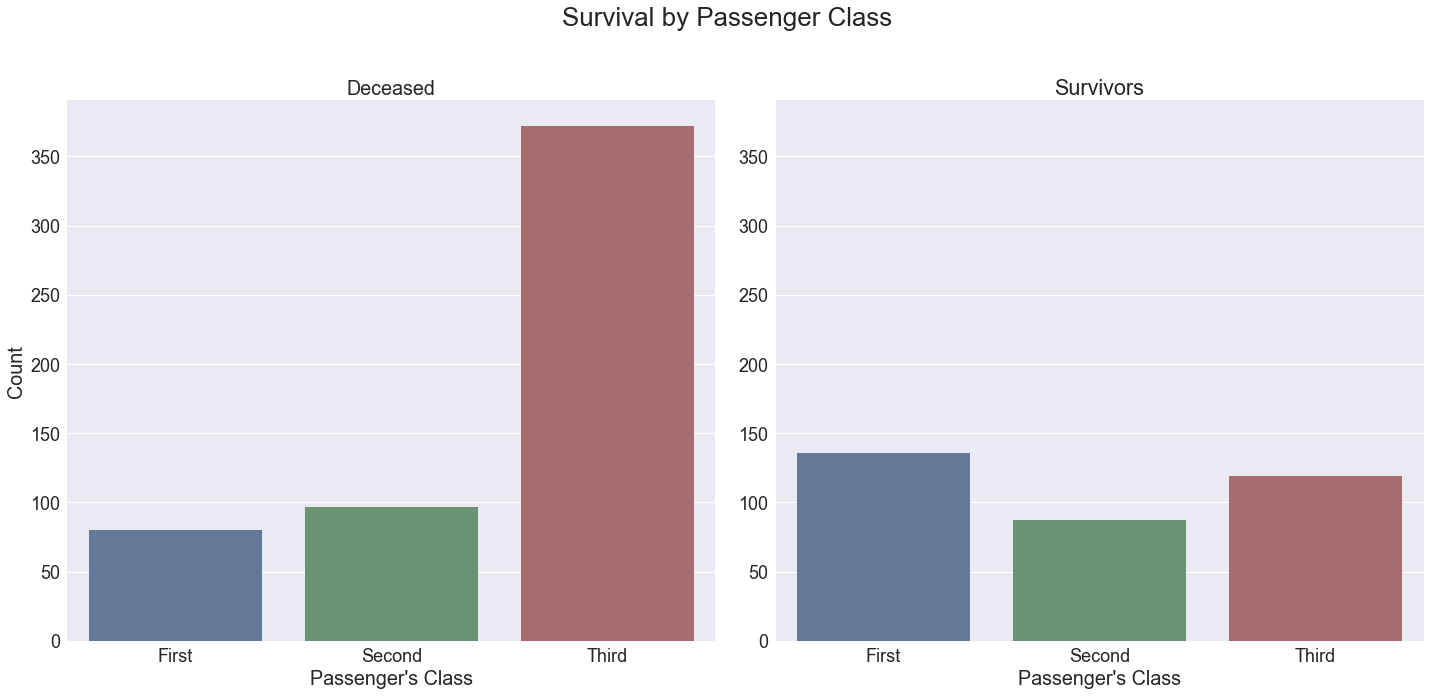

In [14]:
# Count Plot of those who survived by class
sns.set(style="darkgrid", font_scale=1.8)
class_survival = sns.factorplot(x='Pclass', col='Survived', data=titanic_df, 
                                kind='count', saturation=0.5, size=10);
class_survival.set_axis_labels("Passenger's Class", 'Count');
class_survival.set_xticklabels(['First', 'Second', 'Third']);
class_survival.set_titles("Deceased");
plt.title('Survivors');
plt.subplots_adjust(top=0.85);
class_survival.fig.suptitle('Survival by Passenger Class');

## Results
- Wealthy passengers ('PClass' == 1) survived at a higher rate than any other class.
- Poor passengers ('PClass' == 3) died at a higher rate than any other class.

# SEX INVESTIGATION
- Was a passenger's sex influential to survival?

Sex Counts:
male      577
female    314
Name: Sex, dtype: int64


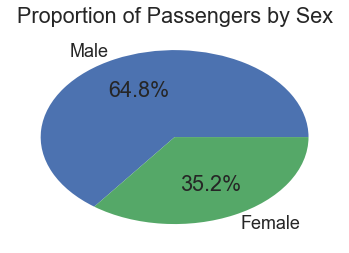

In [15]:
# Creates a series of totals of each sex
sex_slice = titanic_df['Sex'].value_counts()
print "Sex Counts:\n", sex_slice

# Creates a pie plot of passenger's sex
plt.pie(sex_slice, labels=['Male', 'Female'], autopct='%1.1f%%');
plt.title('Proportion of Passengers by Sex');
# plt.legend(bbox_to_anchor=(1.30, 1.0));

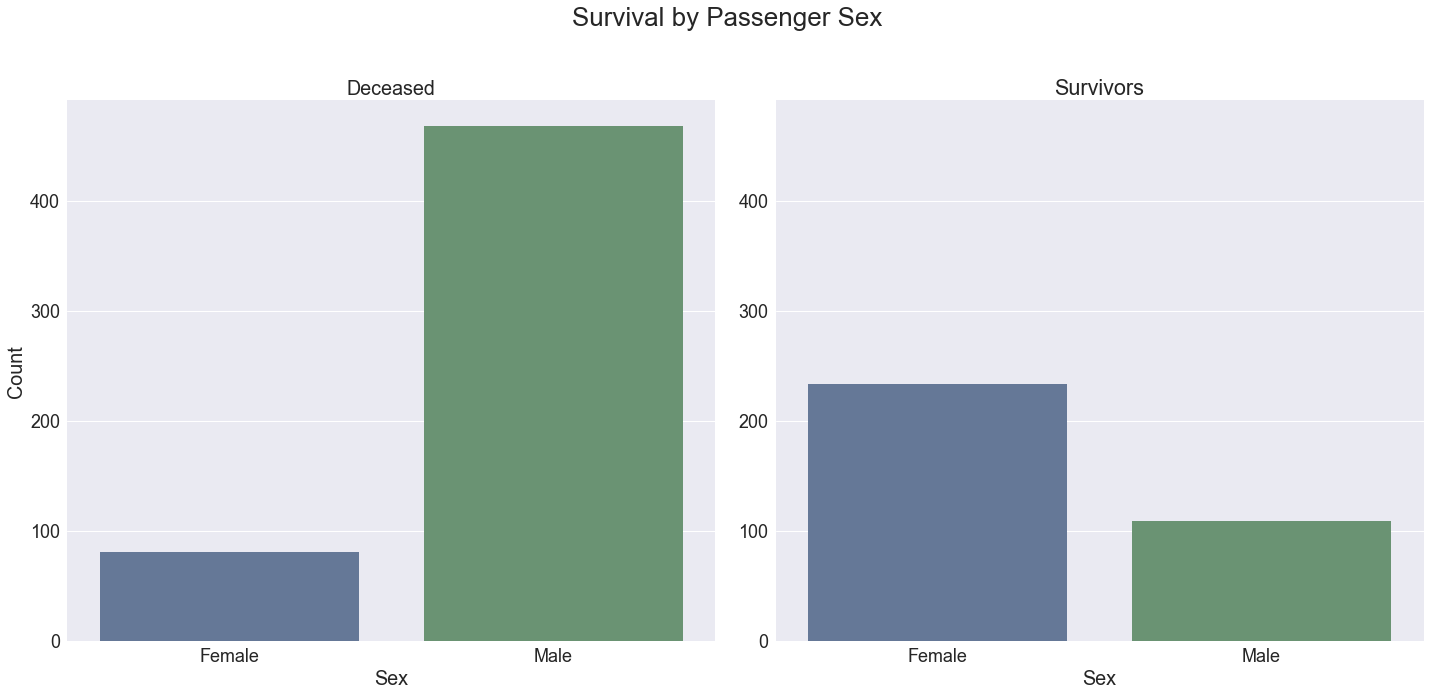

In [16]:
# Count Plot of those who survived by sex
sex_plot = sns.factorplot(x='Sex', col='Survived', data=titanic_df, kind='count', saturation=0.5, size=10);
sex_plot.set_axis_labels("Sex", 'Count');
sex_plot.set_xticklabels(['Female', 'Male']);
sex_plot.set_titles("Deceased");
plt.title('Survivors');
plt.subplots_adjust(top=0.85);
sex_plot.fig.suptitle('Survival by Passenger Sex');

Female survival:
1    233
0     81
Name: Survived, dtype: int64


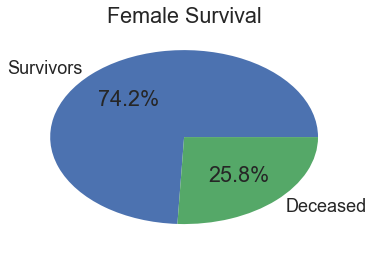

In [17]:
# Creates a dataframe of female passengers
female_df = titanic_df[titanic_df['Sex'] == 'female']

# Creates a series of totals for survival
female_survival = female_df['Survived'].value_counts()
print "Female survival:\n", female_survival

# Creates a pie plot of survival for female passengers
plt.pie(female_survival, labels=['Survivors', 'Deceased'], autopct='%1.1f%%');
plt.title('Female Survival');

Male survival:
1    109
0    468
Name: Survived, dtype: int64


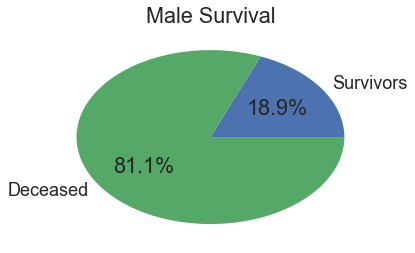

In [18]:
# Creates a dataframe of male passengers
male_df = titanic_df[titanic_df['Sex'] == 'male']

# Creates a series of totals for survival
male_survival = male_df['Survived'].value_counts(ascending=True)
print "Male survival:\n", male_survival

# Creates a pie plot of survival for female passengers
plt.pie(male_survival, labels=['Survivors', 'Deceased'], autopct='%1.1f%%');
plt.title('Male Survival');

## Results
- Female passengers survived proportionally higher than male passengers
- Male passengers disproportionally died from the titanic crash as compared to female passengers

# CABIN NUMBER INVESTIGATION
- Was cabin number influential to survival?

In [19]:
# Creates a Series of 'Cabin' numbers that exist
cabin_number_exists = titanic_df['Cabin'].dropna()

# Creates a dataframe where there exists a 'Cabin' value; 204 entries
cabin_df = titanic_df[titanic_df.Cabin.isin(cabin_number_exists)]
cabin_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [20]:
# Overall survival vs number of passengers
print "Given a value exists for 'Cabin'"
print 'Number of survivors:', len(cabin_df[cabin_df.Survived == 1])
print 'Number of passengers:', len(cabin_df['Survived'])
print 'Survival proportion:', float(len(cabin_df[cabin_df.Survived == 1]))/float(len(cabin_df['Survived']))

Given a value exists for 'Cabin'
Number of survivors: 136
Number of passengers: 204
Survival proportion: 0.666666666667


### Note:
- There is significantly higher number of individuals who survived in this dataset compared to the titanic_df (survival proportion = 0.384)

### Data Wrangling
- A new dataframe was cleaned to convert all cabin numbers to their respective deck to simplify analysis by deck level rather than each specific cabin

In [21]:
new_cabin_df = cabin_df.copy()

# Strip digits from 'cabin' variable of new_cabin_df and replace with nothing
new_cabin_df['Cabin'] = new_cabin_df['Cabin'].str.replace('\d+', '')
print "Counts of each floor entry:\n", new_cabin_df['Cabin'].value_counts()

Counts of each floor entry:
C          51
B          36
D          32
E          32
A          15
F           9
B B         7
C C C       4
C C         4
G           4
F G         3
B B B B     2
B B B       2
T           1
F E         1
D D         1
Name: Cabin, dtype: int64


In [22]:
# Editing of dataframe for passengers with multiple cabin rooms on B, C, and D deck of Titanic
new_cabin_df['Cabin'] = new_cabin_df['Cabin'].replace(to_replace="B B", value="B")
new_cabin_df['Cabin'] = new_cabin_df['Cabin'].replace(to_replace="B B B", value="B")
new_cabin_df['Cabin'] = new_cabin_df['Cabin'].replace(to_replace="B B B B", value="B")
new_cabin_df['Cabin'] = new_cabin_df['Cabin'].replace(to_replace="C C", value="C")
new_cabin_df['Cabin'] = new_cabin_df['Cabin'].replace(to_replace="C C C", value="C")
new_cabin_df['Cabin'] = new_cabin_df['Cabin'].replace(to_replace="D D", value="D")
new_cabin_df['Cabin'] = new_cabin_df['Cabin'].replace(to_replace=["F G", "F E"], value="Cabins on Multiple Decks")

# Rename 'cabin' column
new_cabin_df = new_cabin_df.rename(columns={'Cabin': 'Deck'})

new_cabin_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Deck,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C,S


In [23]:
new_cabin_df.Deck.value_counts()

C                           59
B                           47
D                           33
E                           32
A                           15
F                            9
G                            4
Cabins on Multiple Decks     4
T                            1
Name: Deck, dtype: int64

### Information Regarding Cabins
- Used titanic deckplans from (https://www.encyclopedia-titanica.org/titanic-deckplans/) to visualize deck locations. Decks in order from highest point on ship to lowest:
    - Promenade Deck = 'A' deck
    - Bridge Deck = 'B' deck
    - Shelter Deck = 'C' deck
    - Saloon Deck = 'D' deck
    - Upper Deck = 'E' deck
    - Middle Deck = 'F' deck
    - Lower Deck = 'G' deck
    - *'T' deck equivalent was unable to be found
    
### Assessment:
- Considering overall survival is higher in this subset. It may be helpful to see the makeup of this group.
    - Records regarding cabin number disproportionally represent first class passengers
    - The sex distribution is close to even

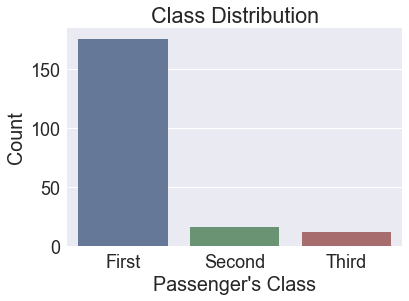

In [24]:
# Count Plot by class
cabin_class = sns.countplot(x='Pclass', data=new_cabin_df, saturation=0.5);
cabin_class.set_xticklabels(['First', 'Second', 'Third']);
plt.title('Class Distribution');
plt.xlabel("Passenger's Class");
plt.ylabel('Count');

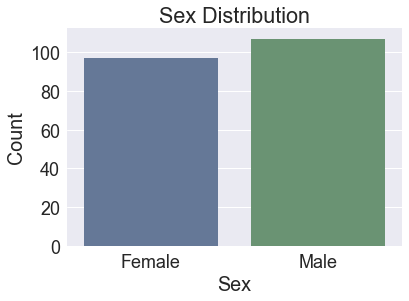

In [25]:
# Count Plot by sex
cabin_sex = sns.countplot(x='Sex', data=new_cabin_df, saturation=0.5);
cabin_sex.set_xticklabels(['Female', 'Male']);
plt.title('Sex Distribution');
plt.xlabel("Sex");
plt.ylabel('Count');

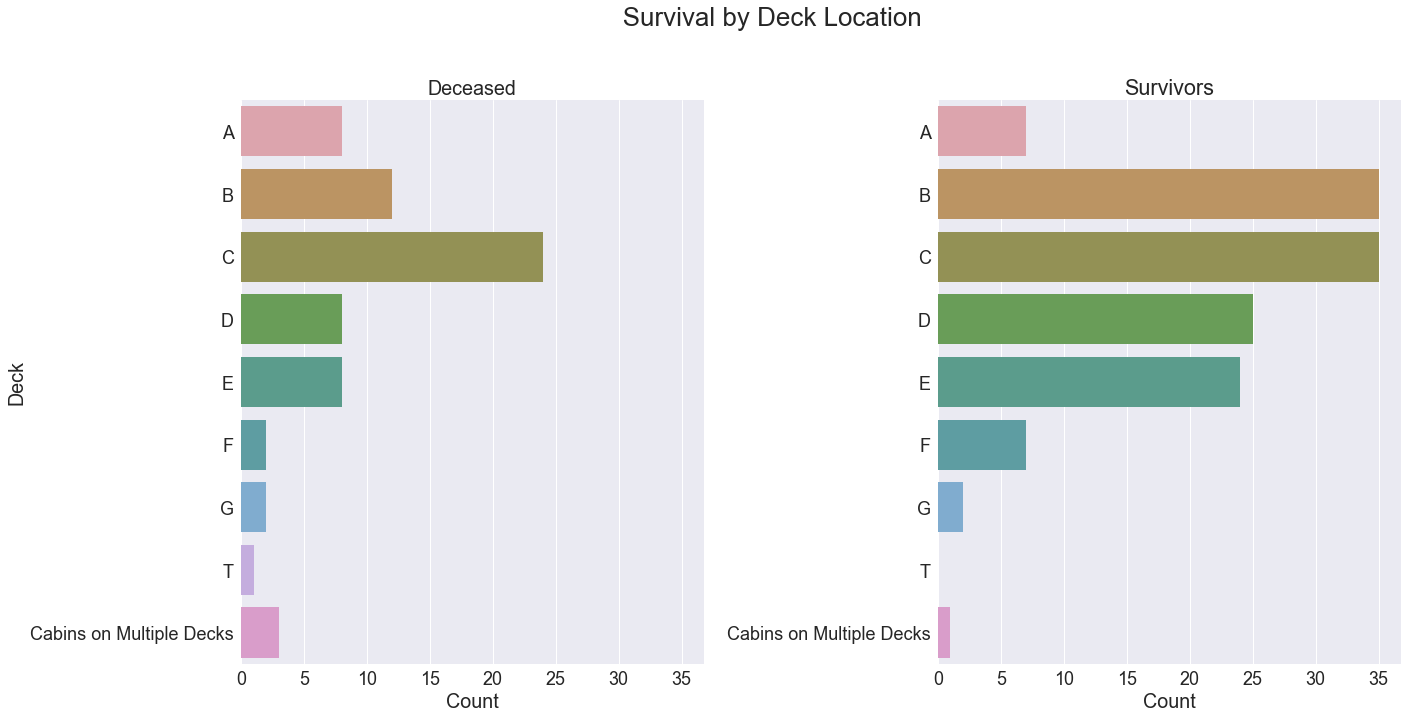

In [26]:
# Count Plot of those who survived by cabin
cabin_plot = sns.factorplot(y='Deck', col='Survived', data=new_cabin_df, 
                          order=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T', 'Cabins on Multiple Decks'],
                          kind='count', saturation=0.5, size=10);
cabin_plot.set_axis_labels('Count', "Deck");
cabin_plot.set_titles("Deceased");
plt.title('Survivors');
cabin_plot.fig.suptitle('                   Survival by Deck Location');
plt.subplots_adjust(top=0.85);

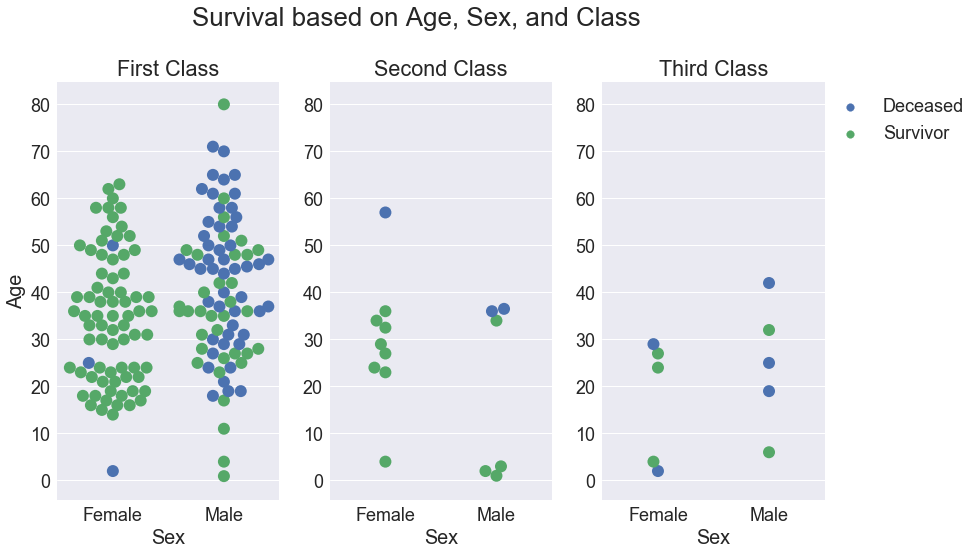

In [27]:
# Multi-variable swarm plot of survival
multi_plot = sns.factorplot(data=new_cabin_df, col='Pclass', x='Sex', y='Age', hue='Survived', 
               kind='swarm', size=8, aspect=0.5, s=12, legend=False) # Use matplotlib legend functionality
multi_plot.set_xticklabels(['Female', 'Male']);
multi_plot.set_axis_labels('Sex', "Age");
multi_plot.fig.suptitle('Survival based on Age, Sex, and Class');
plt.subplots_adjust(top=0.85);

# To change column titles
titles = ["First Class", "Second Class", "Third Class"]
for ax, title in zip(multi_plot.axes.flat, titles):
    ax.set_title(title)

# Adjusting legend
legend = plt.legend(bbox_to_anchor=(1.7, 1.0));
legend.get_texts()[0].set_text('Deceased');
legend.get_texts()[1].set_text('Survivor');

## Results
- Deck level did not seem to attribute a particular advantage in survival.
- Male passengers died proportionally higher than females

# Conclusion
- Analysis on passenger survival was performed on the fields of: age, class, sex, and cabin
- The distribution of survivors and deceased by age was very similar, but noticeable differences were observed for two age groups.
    - Passengers between the ages of 0 and 10 showed the highest survival ratio (survivors/deceased) of any age group
    - Passengers between the ages of 20 and 30 showed the lowest survival ratio of any age group
- The distribution of survivors by class was stark.
    - First class passengers had a disproportionally higher survival ratio than second and third class passengers
    - Third class passengers had by far the lowest survival ratio
- Female passengers were far more likely to have survived than male passengers
- Analyzing a dataframe that included only entries with a 'Cabin' value showed significant bias with a far larger proportion of first class passengers than the entire titanic dataset. 
    - Regardless, this dataset showed a high survival ratio for all decks on the titanic, except the 'A' deck which had more deceased than survivors.
- Save the women and children!
- Limitations:
    - Although some trends appeared in the data, there are a number of limitations present.
    - The dataset contains 891 observations, but 2240 passengers set sail on the Titanic (http://www.history.com/topics/titanic), so one third of the story might not be enough to make definitive conclusions.
    - A significant amount of data was missing for cabin locations so any insights from that subset of data is very limited.
        - Additional data would be helpful to analyze cabins by vertical position vs horizontal position (each deck) to maybe determine how different parts of the boat may have filled with water and resulted in passengers deaths.